                            Assignment:  CHI_SQUARE_TEST

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Chi_Sample_Data.csv to Chi_Sample_Data.csv


In [2]:
import pandas as pd
df=pd.read_csv('Chi_Sample_Data.csv')
df

,Satisfaction,Smart Thermostat,Smart Light,Total
0,Very Satisfied,50,70,120
1,Satisfied,80,100,180
2,Neutral,60,90,150
3,Unsatisfied,30,50,80
4,Very Unsatisfied,20,50,70
5,Total,240,360,600


In [4]:
df.shape

(6, 4)

In [ ]:
# Null Hypothesis (H₀): Smart Thermostat and Smart Light are not related to each other
# Alternative Hypothesis (H₁): Smart Thermostat and Smart Light are related to each other

In [5]:
pip install researchpy


In [6]:
pd.crosstab(df["Smart Thermostat"],df["Smart Light"],margins=True)

Smart Light,50,70,90,100,360,All
Smart Thermostat,,,,,,
20,1,0,0,0,0,1
30,1,0,0,0,0,1
50,0,1,0,0,0,1
60,0,0,1,0,0,1
80,0,0,0,1,0,1
240,0,0,0,0,1,1
All,2,1,1,1,1,6


In [7]:
import researchpy as rp
table,results = rp.crosstab(df["Smart Thermostat"],df["Smart Light"],test='chi-square')
print(table)
print(results)

                 Smart Light                  
Smart Light               50 70 90 100 360 All
Smart Thermostat                              
20                         1  0  0   0   0   1
30                         1  0  0   0   0   1
50                         0  1  0   0   0   1
60                         0  0  1   0   0   1
80                         0  0  0   1   0   1
240                        0  0  0   0   1   1
All                        2  1  1   1   1   6
                 Chi-square test  results
0  Pearson Chi-square ( 20.0) =   24.0000
1                     p-value =    0.2424
2                  Cramer's V =    1.0000


In [13]:
# Degrees of freedom and significance level
import scipy.stats as stats
df=15
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, df)
critical_value


24.995790139728616

In [14]:
# Now, you can compare the calculated chi-square statistic values (0.2424) with the critical value
# Now, the critical value for df = 15 and α = 0.05 is 24.995790139728616.
# Since, critical value is greater than chi-square value, we accept the null hypothesis.

alpha = 0.05
#PVALUE = results.iloc[1:2,1].values
PVALUE= 0.2424
if PVALUE<alpha:
    print("Ho is rejected and H1 is accepted")
else:
    print("H1 is rejected and Ho is accepted")


H1 is rejected and Ho is accepted


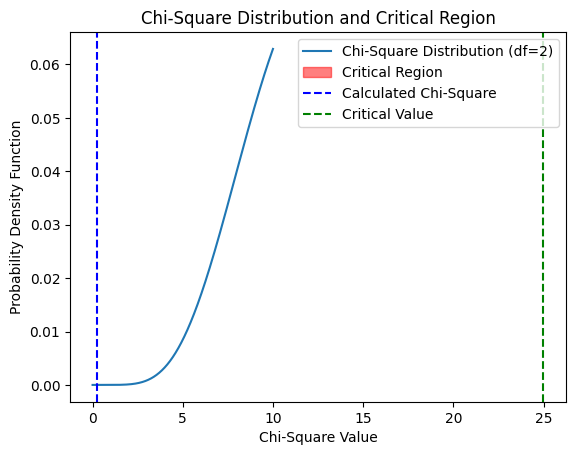

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = 15
alpha = 0.05
critical_value = 24.995790139728616
calculated_chi_square = 0.2424

# Generate values for the chi-square distribution
x = np.linspace(0, 10,1000)
y = stats.chi2.pdf(x, df)

plt.plot(x, y, label='Chi-Square Distribution (df=2)')
plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=0.5, label='Critical Region')
plt.axvline(calculated_chi_square, color='blue', linestyle='dashed', label='Calculated Chi-Square')
plt.axvline(critical_value, color='green', linestyle='dashed', label='Critical Value')
plt.title('Chi-Square Distribution and Critical Region')
plt.xlabel('Chi-Square Value')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()


Observation and Conclusion:

In this analysis, we performed a Chi-Square Test of Independence to assess whether there is a significant association between the use of Smart Thermostat and Smart Light devices.

Key Observations:
The Chi-square statistic = 24.0000

The p-value = 0.2424

The degrees of freedom (df) = 15

The critical value at α = 0.05 and df = 15 = 24.9958

Since the p-value (0.2424) > alpha (0.05) and the Chi-square statistic (24.00) < critical value (24.9958):

We fail to reject the null hypothesis.

Conclusion:
There is not enough statistical evidence to conclude that Smart Thermostat usage and Smart Light usage are related. Thus, based on the given data, we accept the null hypothesis and state that:

"Smart Thermostat and Smart Light are not significantly associated with each other."
